In [1]:
# TODO: Optimize MCMC code to run faster using parallelization or multithreading
# TODO: Add detailed docstrings to all functions and classes for better code documentation
# TODO: Implement unit tests
# TODO: Add more flexible parameter grid options for the models
# TODO: Investigate old code to understand why Spearman's rho used to be higher and orders were closer to the ideal order

import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

## SIGMOID demo

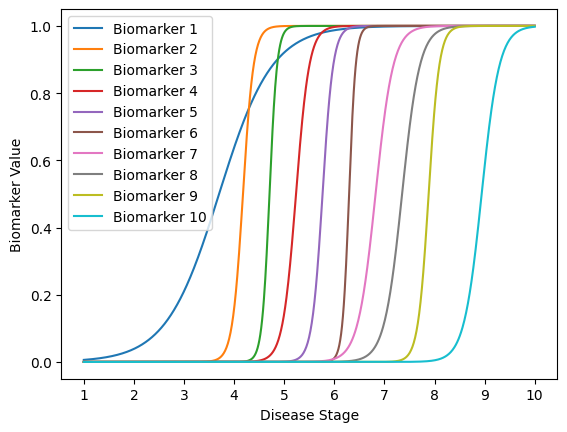

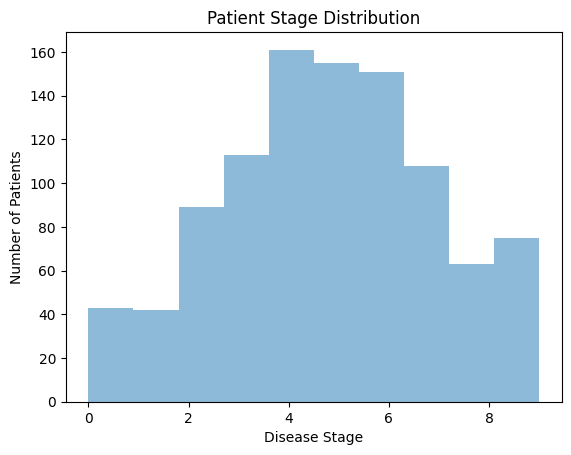

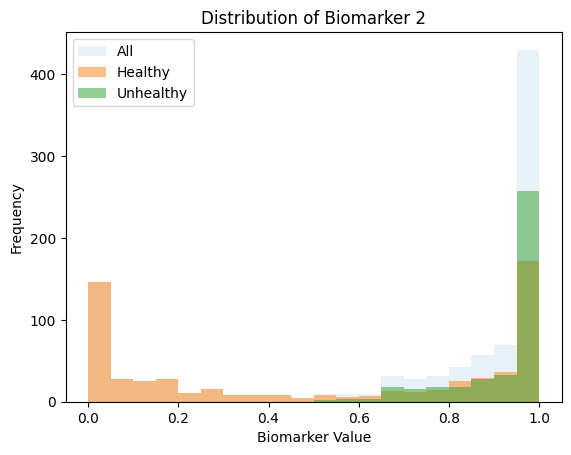

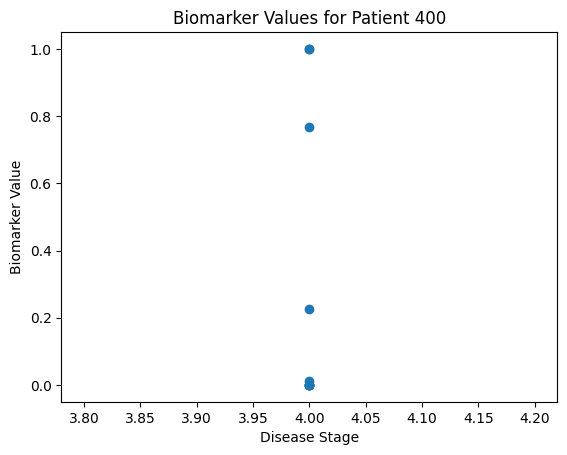

In [2]:
# model parameters
n_biomarker_stages = 10
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 0.1, 'c': 1.0},
    1: {'s': 0.5, 'c': 10.0},
    2: {'s': 0.7, 'c': 20.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0},
    9: {'s': 0.3, 'c': 100.0},
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=True, noise_std=0.2, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=0.5)
sample_generator.plot_patient_biomarkers(patient_index=400)

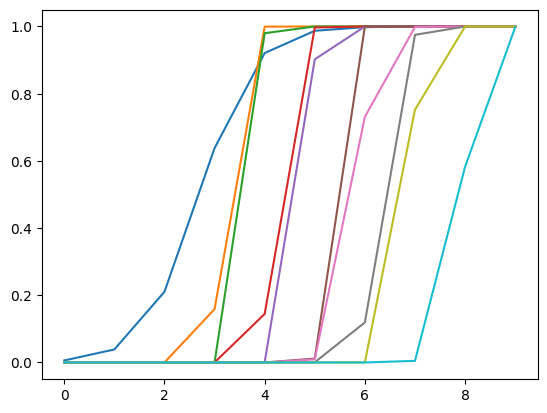

In [8]:
import seaborn as sns
for marker in canonical_generator.biomarker_values[:]:
    sns.lineplot(marker)
    

In [11]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix, orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3465.80it/s]


Greedy Ascent Result: [0 1 2 3 4 6 5 7 8 9]


100%|██████████| 500000/500000 [02:21<00:00, 3529.71it/s]

Spearman's rho values: 0.9878787878787878
First 10 MCMC sampled orders: [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9])]


In [8]:
print(likelihood_matrix)
print(likelihood_matrix.shape)

[[1.98141961e-09 1.97968010e-08 1.43584548e-01 ... 1.23550953e-07
  3.07301738e-08 1.46508905e-07]
 [2.49781837e-09 2.70324972e-07 1.81005639e-01 ... 1.17652514e-01
  1.14616961e-01 1.14043076e-01]
 [2.47373785e-09 2.40977493e-08 2.23333400e-01 ... 8.96539152e-02
  1.14616961e-01 1.14043076e-01]
 ...
 [8.94656746e-10 9.24421171e-01 6.48317421e-02 ... 1.17652517e-01
  1.10791997e-01 1.13929870e-01]
 [8.79351397e-10 8.31813593e-09 6.37226325e-02 ... 9.62808866e-02
  1.14616963e-01 1.11558507e-01]
 [9.11284079e-10 7.83670156e-04 6.60366499e-02 ... 1.13523370e-01
  1.14616963e-01 1.14043078e-01]]
(10, 1000)


### TRANSITION MATRIX demo

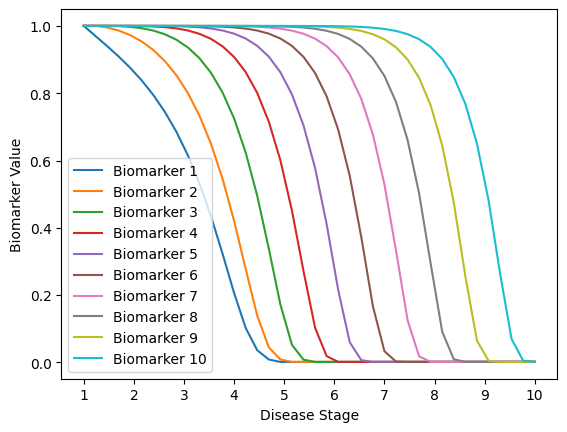

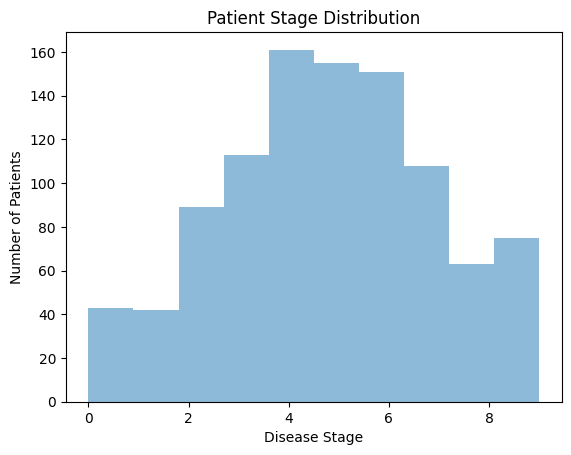

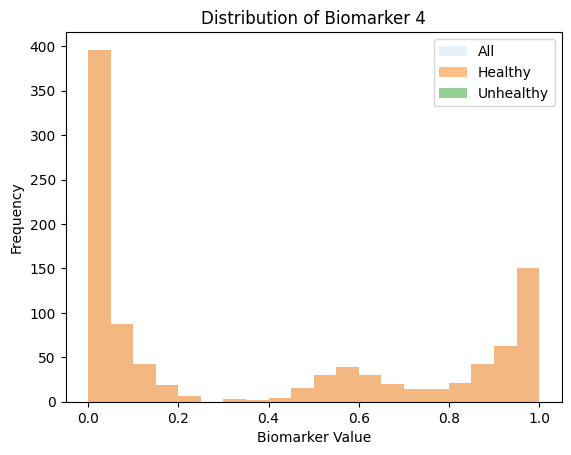

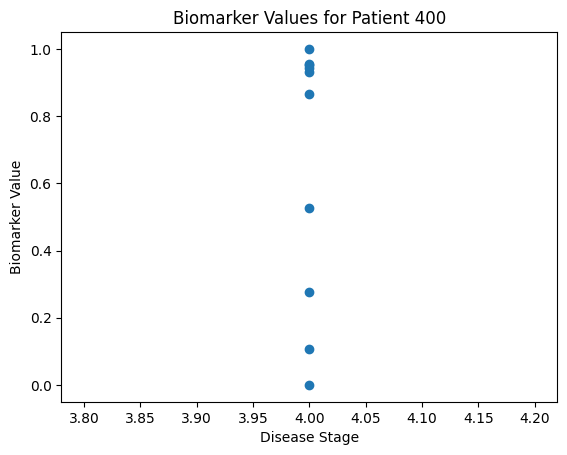

In [3]:
import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

# model parameters
n_biomarker_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1.5e-1}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, biomarkers_params=biomarkers_params_transition)
canonical_generator.plot_disease_progression() # plot disease progression

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std = 0.08, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index = 3, healthy_stage_threshold=3)
sample_generator.plot_patient_biomarkers(patient_index=400)


In [4]:
print(canonical_generator.model_values.shape)
print(canonical_generator.biomarker_values.shape)

(10, 40)
(10, 10)


In [5]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix, orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3635.96it/s]


Greedy Ascent Result: [0 3 1 2 4 5 6 7 8 9]


100%|██████████| 500000/500000 [02:18<00:00, 3622.29it/s]

Spearman's rho values: 0.9636363636363635
First 10 MCMC sampled orders: [array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9]), array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9])]


## ODE demo

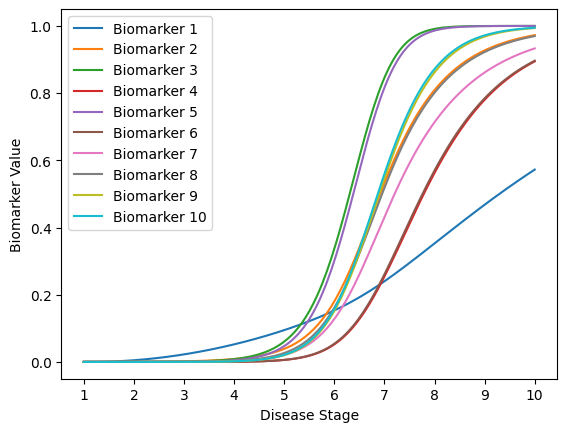

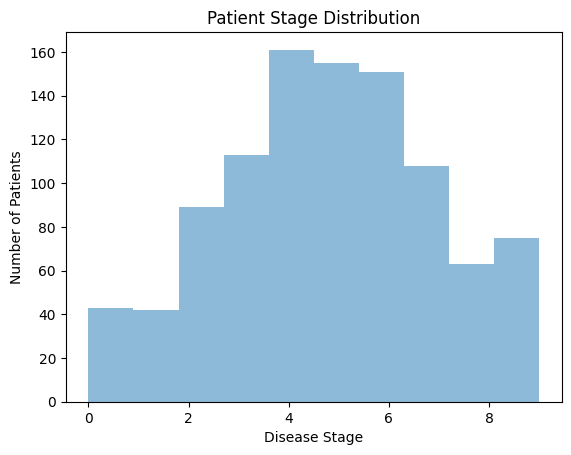

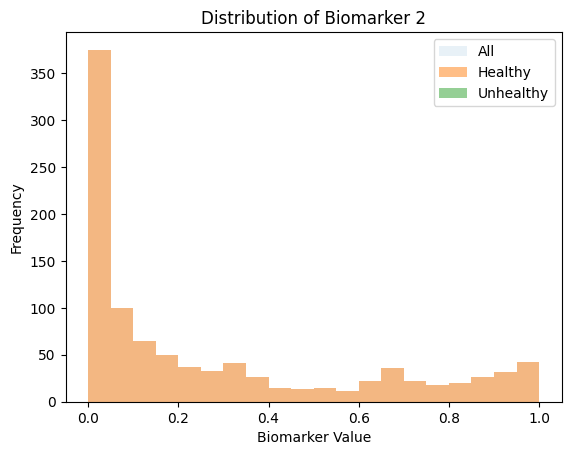

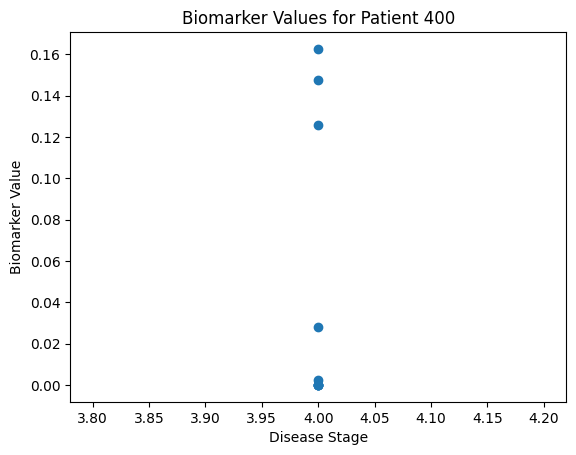

In [24]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'ode'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)

(10, 203)
(10, 10)
0.9999942706291682
0.9998287564675329


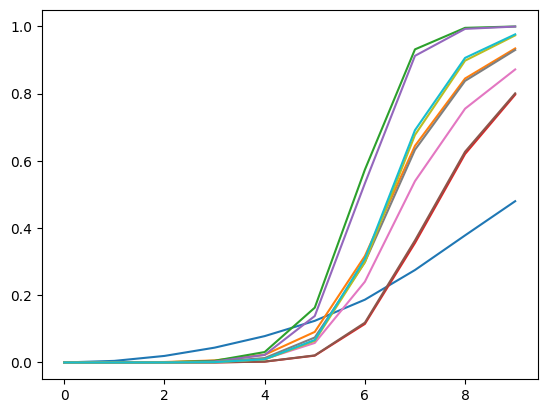

In [25]:
import seaborn as sns
print(canonical_generator.model_values.shape)
print(canonical_generator.biomarker_values.shape)

print(canonical_generator.model_values.max())
print(canonical_generator.biomarker_values.max())

for marker in canonical_generator.biomarker_values[:]:
    sns.lineplot(marker)

In [13]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix, orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3619.44it/s]


Greedy Ascent Result: [3 5 8 1 9 2 7 4 6 0]


100%|██████████| 500000/500000 [02:17<00:00, 3624.00it/s]

Spearman's rho values: -0.13939393939393938
First 10 MCMC sampled orders: [array([3, 5, 8, 1, 9, 7, 2, 4, 6, 0]), array([3, 5, 8, 1, 7, 9, 2, 4, 6, 0]), array([3, 5, 8, 1, 4, 9, 2, 7, 6, 0]), array([3, 5, 8, 1, 7, 9, 2, 4, 6, 0]), array([3, 5, 8, 1, 4, 9, 2, 7, 6, 0]), array([3, 5, 8, 1, 4, 9, 7, 2, 6, 0]), array([3, 5, 8, 1, 4, 7, 9, 2, 6, 0]), array([3, 5, 8, 1, 4, 9, 7, 2, 6, 0]), array([3, 5, 8, 1, 4, 7, 9, 2, 6, 0]), array([3, 5, 8, 1, 7, 4, 9, 2, 6, 0])]
